# Zomato Bangalore Restaurant Rating Prediction

Link:-https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

# PROBLEM STATEMENT
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from allover the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. As data scientists, we are gonna prove that given the right data anything can be predicted 

Now, we will build a model to predict the rating of restaurant based on different features using machine learning models. which will help them to find best restaurant for customers.


# FEATURES

url:-contains the url of the restaurant in the zomato website

address:-contains the address of the restaurant in Bengaluru 

name:-contains the name of the restaurant

online_order:-whether online ordering is available in the restaurant or not

book_table:-table book option available or not

rate:-contains the overall rating of the restaurant out of 5

votes:-contains total number of rating for the restaurant as of the above mentioned date

phone:-contains the phone number of the restaurant

location:-contains the neighborhood in which the restaurant is located

rest_type:-restaurant type

Average Cost for two: Cost for two people 

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed


# LOADING LIBRARIES¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# Loading dataset

In [2]:
df = pd.read_csv("E:/IMARTICUS LEARNING/Competition/Zomato/zomato.csv")

In [3]:
df.sample(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51176,https://www.zomato.com/bangalore/flavors-resta...,"120-P, A 3, Santosh Towers, EPIP, KIADB Indust...",Flavors Restaurant,No,No,2.9 /5,16,080 40985253\n+91 9739716505,Whitefield,Casual Dining,NaN,"North Indian, Chinese",700,"[('Rated 4.0', 'RATED\n Hi to all my guest th...",[],Dine-out,Whitefield
31877,https://www.zomato.com/bangalore/basava-hotel-...,"4&5, 1st Main, Old Post Office Road, Opposite ...",Basava Hotel,No,No,NaN,0,+91 9986395777,BTM,Quick Bites,NaN,South Indian,200,[],[],Dine-out,Koramangala 5th Block
33210,https://www.zomato.com/bangalore/zero-kelvin-k...,"80 Feet Road, Koramangala 4th Block, Bangalore",Zero Kelvin,Yes,No,4.3 /5,169,+91 7619369781,Koramangala 4th Block,Dessert Parlor,"Waffles, Thick Shakes, Choco Brownie, Ferrero ...","Desserts, Beverages",450,"[('Rated 5.0', ""RATED\n It's a really good de...",[],Delivery,Koramangala 6th Block


# understanding the dataset

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Checking Missing Values

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#let see the percentage of missing value


<AxesSubplot:>

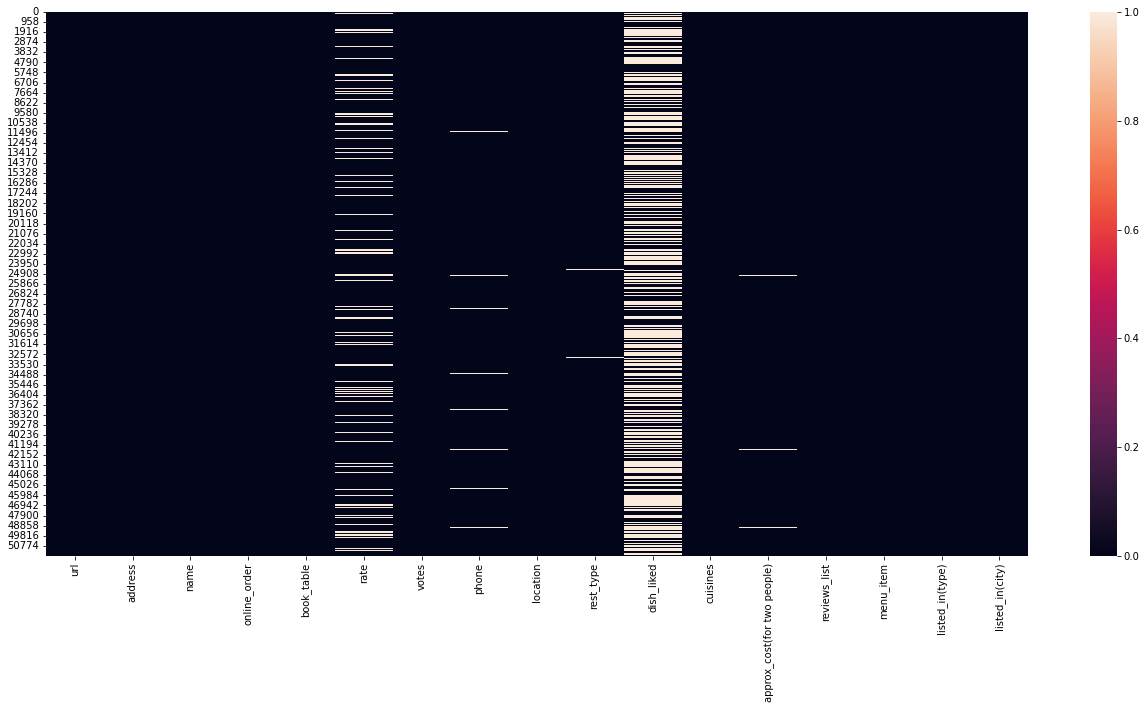

In [8]:
plt.figure(figsize=(22,10))
sns.heatmap(df.isnull())

### Rate, Phone, Dish_liked has some null values

In [9]:
((df.isnull()|df.isna()).sum()*100/df.index.size)

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [11]:
df.shape

(51717, 17)

In [12]:
df=df.drop(['url','address','phone','reviews_list','menu_item','dish_liked'],axis=1)
df.shape

(51717, 11)

In [13]:
#if there is some duplicate value in my data then i will remove it
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

### Data cleaning & convert datatype of rate and cost2plates

We know that the Ratings given in the Column Rate are given out of five so instead of writing with /5 extra stuff better to write the rating itself and removing the /5 part

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see from the above that 'NEW' is of the type other than that of float and nan 

In [15]:
df.rate = df.rate.replace("NEW", np.nan)

In [16]:
df.rate=df.rate.replace('-',np.nan)


In [17]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:

df['rate'] = df['rate'].astype(str) # Converting the rating to the String type from the float type first
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df['rate'] = df['rate'].apply(lambda x: float(x)) # Converting the rating to the Float type from the String type 
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [19]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [20]:
df.rate.isnull().sum()

10019

In [21]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10019
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [22]:
#now drop the null value because there are not so many null value so drop them

In [23]:
df.dropna(inplace=True) # Dropping the enitre row which are having null values 
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [24]:
#now we can see there is no null value is our data

# feature handling

In [25]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates', 'listed_in(type)': 'Type' , 'listed_in(city)':'City'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   Cost2plates   41190 non-null  object 
 9   Type          41190 non-null  object 
 10  City          41190 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


In [26]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [27]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### as we can see that loaction and city columns both have same information so keep only one column location and remove city 

In [28]:
df=df.drop(['City'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   Cost2plates   41190 non-null  object 
 9   Type          41190 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [29]:
df.Cost2plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [30]:

df['Cost2plates'] = df['Cost2plates'].astype(str) # Converting Cost2plates dtype from object to string 
df['Cost2plates'] = df['Cost2plates'].apply(lambda x: x.replace(',',''))
df['Cost2plates'] = df['Cost2plates'].astype(float)

In [31]:
df.Cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

# numerical columns

In [32]:
df.sample(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
26213,Mani's Dum Biryani,Yes,No,3.5,122,Kalyan Nagar,Casual Dining,"Biryani, Andhra",750.0,Dine-out


In [33]:
num_col=[col for col in df.columns if df[col].dtypes!='O' ]

In [34]:
num_col # Numerical columns

['rate', 'votes', 'Cost2plates']

# outlier Detection

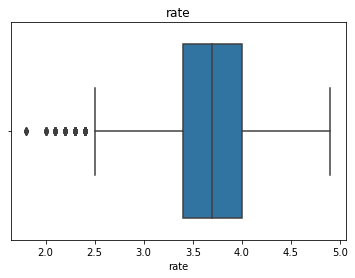

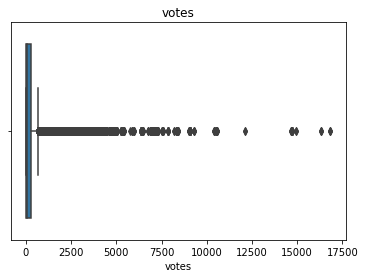

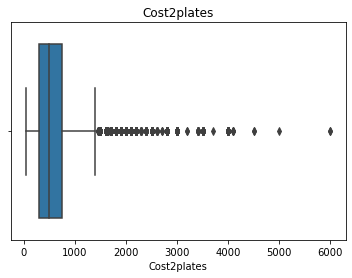

In [35]:
for col in num_col:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()


Conclusion made frome above Boxplot Graph -

Outliers are present in rate, vote and cost2plate

We will not remove the outlier from rate because it contain less no of outlier it doesn't affect so much on our accuracy.

In [36]:
df['rest_type'].value_counts()


Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

as we can see there are very less value in some restaurant so we make cluster for that restaurant

In [37]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   13861
Casual Dining                  9597
Cafe                           3365
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [38]:
rest_type_lessthan1000=rest_types[rest_types<1000]
rest_type_lessthan1000

Bakery                        704
Bar                           640
Beverage Shop                 638
Food Court                    496
Bar, Casual Dining            381
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Dessert Parlor, Kiosk           2
Bakery, Beverage Shop           1
Quick Bites, Kiosk              1
Name: rest_type, Length: 80, dtype: int64

In [39]:
#making rest_type less than 1000 as others

In [40]:
def handle_rest_type(value):
  if(value in rest_type_lessthan1000 ):
        return 'others'
  else: 
      return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           13861
Casual Dining          9597
others                 8490
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Name: rest_type, dtype: int64

In [41]:
#creating lacation column

In [42]:
df['location'].value_counts()

BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [43]:
location=df['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()
    

others                   4667
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1407
Bannerghatta Road        1224
Koramangala 7th Block    1053
Koramangala 6th Block    1052
Brigade Road             1048
Bellandur                 996
Sarjapur Road             852
Koramangala 1st Block     851
Ulsoor                    843
Koramangala 4th Block     841
Electronic City           832
MG Road                   792
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Richmond Road             603
Residency Road            601
Basavanagudi              595
Frazer Town               563
Church Street             543
Brookefield               543
New BEL Road              506
Kammanahalli              492
Lavelle Road              476
Cunningham Road           474
Banaswadi 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  object 
 2   book_table    41190 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  object 
 6   rest_type     41190 non-null  object 
 7   cuisines      41190 non-null  object 
 8   Cost2plates   41190 non-null  float64
 9   Type          41190 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


In [45]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                23103
North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: cuisines, Length: 62, dtype: int64

In [46]:
#now our data is clean lets do visualization

In [47]:
#countplot of various location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Koramangala 5th Block'),
  Text(10, 0, 'Richmond Road'),
  Text(11, 0, 'HSR'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Bellandur'),
  Text(14, 0, 'Sarjapur Road'),
  Text(15, 0, 'Marathahalli'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road

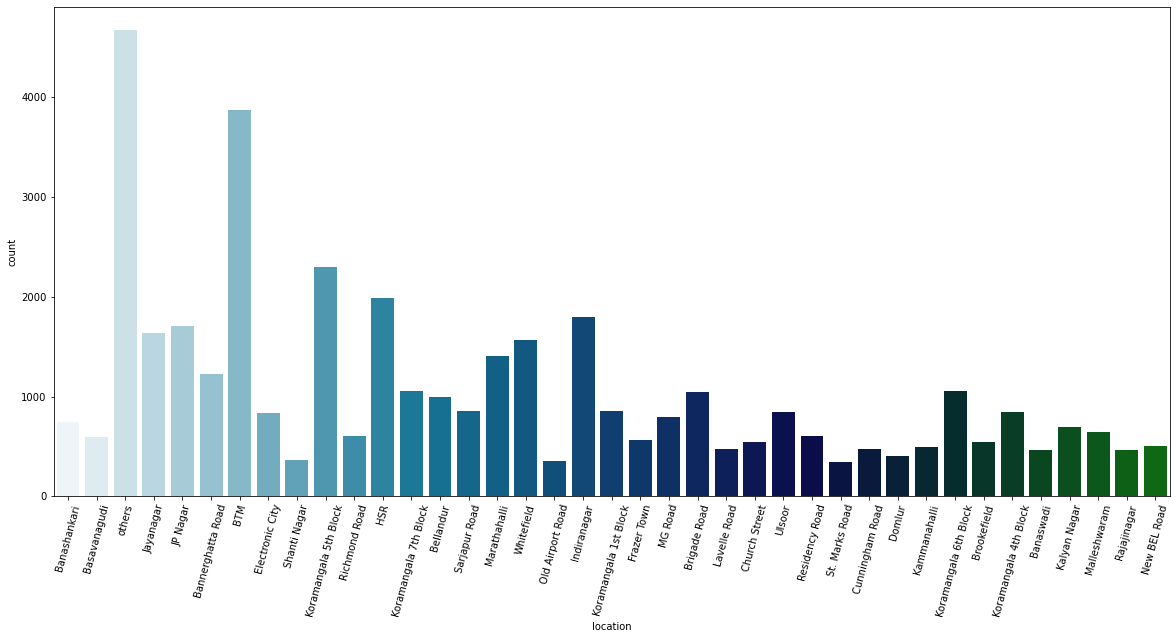

In [48]:
plt.figure(figsize=(20,9))
sns.countplot(df['location'],palette='ocean_r')
plt.xticks(rotation=75)

#so here we can analysis that more no.of restaurants are present in BTM,so by this we can understood that if i want to open 
restaurant than i should not open in btm  because there are so many restaurant rather than i can open in old airport or st.marks road because there is less restaurant,so there is chances are that my business will grow

Text(0.5, 1.0, 'Restaurants provides Table Booking or Not')

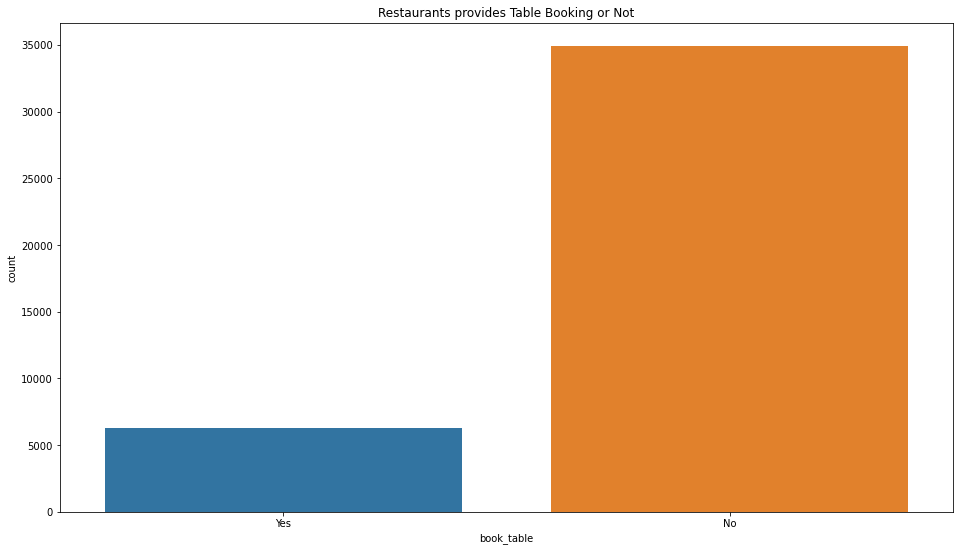

In [49]:
# plot of the restaurants that provide table booking or not
plt.figure(figsize=(16,9))
sns.countplot(df['book_table'])
plt.title('Restaurants provides Table Booking or Not')

From the above plot we can a large portion of the Restaurant don't provide Booking Facility

Text(0.5, 1.0, 'Restaurants delivering online or Not')

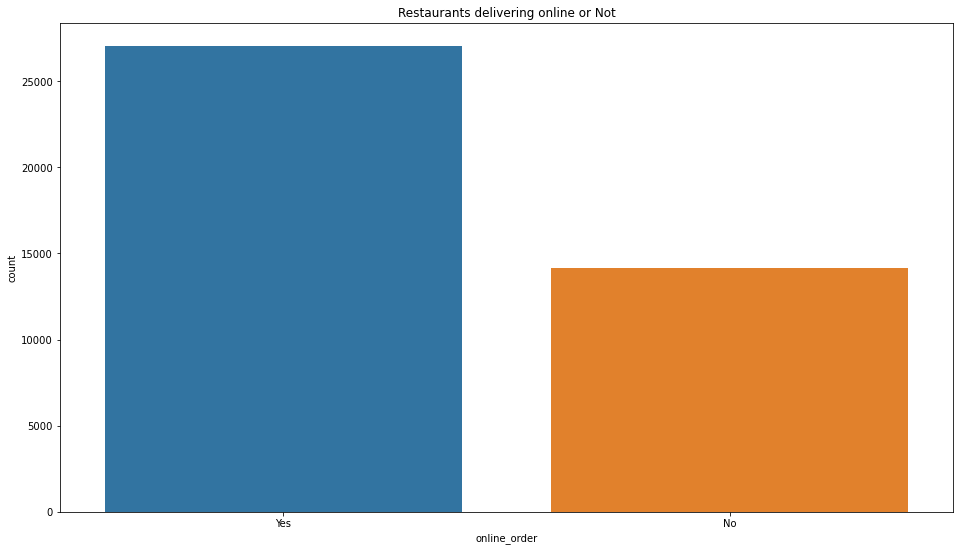

In [50]:
# Plot of the Restaurant, whether they are accepting the online_order or not
plt.figure(figsize=(16,9))
sns.countplot(df['online_order'])
plt.title('Restaurants delivering online or Not')

The above Plot  indicates that a large segments of the Restaurant are having online facility and most of them are not having online order facility

In [51]:
#visualizing online order vs rate

Text(0.5, 1.0, 'Online Order Vs Rate')

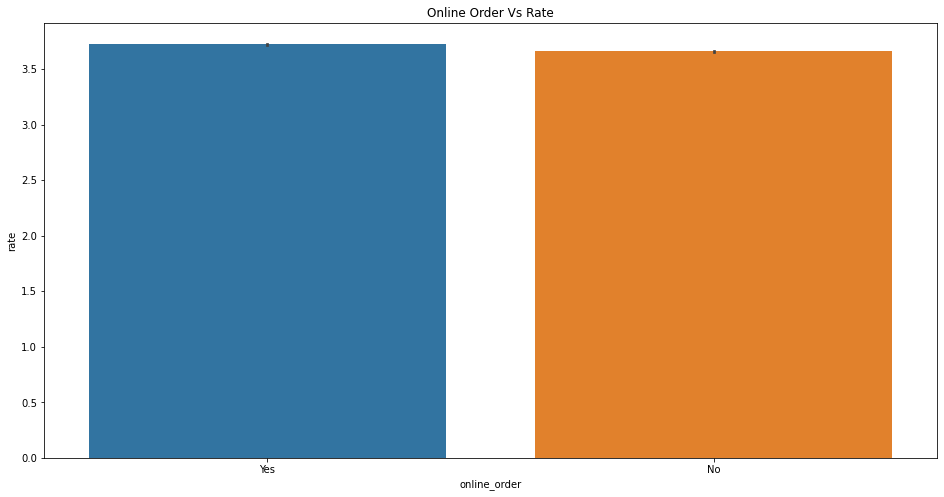

In [52]:
plt.figure(figsize=(16,8))
sns.barplot(x='online_order',y='rate',data=df)
plt.title("Online Order Vs Rate")

so here we can see that people rating more 4.8 who have online order facilty compared to 4.2 who are not having online order facility


In [53]:
#visualizing book_table vs rate

Text(0.5, 1.0, 'Book Table Vs Rate')

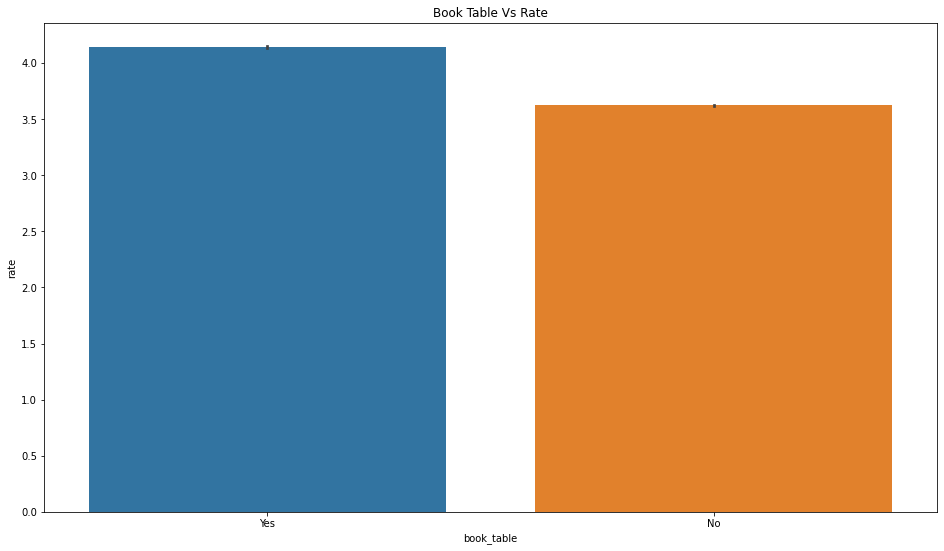

In [54]:
plt.figure(figsize=(16,9))
sns.barplot(x='book_table',y='rate',data=df)
plt.title("Book Table Vs Rate")

#here we can see that those restaurant having book table facility they have more rating as compare to those who are not having book table facility

# Percentage of Restaurants Ratings

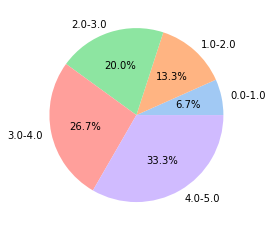

In [55]:
rate_percent = [1.0,2.0,3.0,4.0,5.0]
rate_range = (['0.0-1.0','1.0-2.0','2.0-3.0','3.0-4.0','4.0-5.0'])
plt.pie(x=rate_percent,labels=rate_range,autopct="%.1f%%",colors = sns.color_palette('pastel')[0:5])
plt.show()

Text(0.5, 0, 'Number of Outlets')

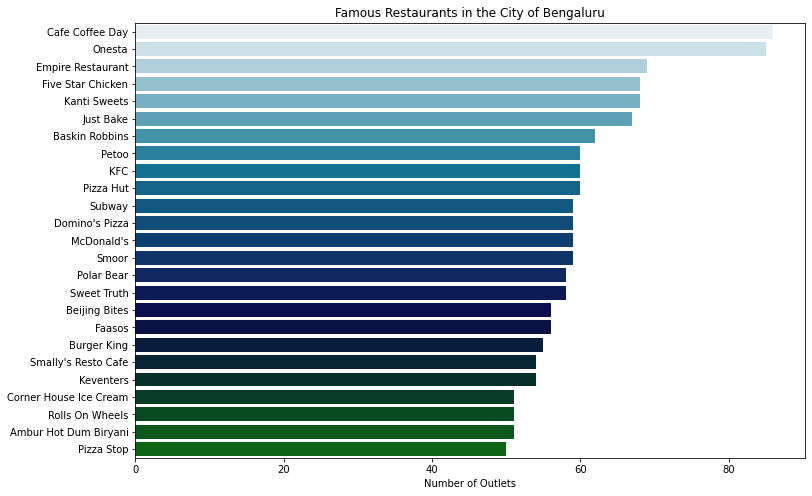

In [56]:
# Plotting for the Top Restuarant in the Bengaluru

plt.figure(figsize=(12,8))
val = df['name'].value_counts()[:25]  # Considering for the top 25 restaurants
sns.barplot(x=val, y=val.index, palette = "ocean_r")
plt.title("Famous Restaurants in the City of Bengaluru")
plt.xlabel("Number of Outlets")

In [57]:
#visualizing online order facility,location wise by pivot table
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1016  2857
Banashankari            273   471
Banaswadi               171   292
Bannerghatta Road       396   828
Basavanagudi            183   412
Bellandur               331   665
Brigade Road            441   607
Brookefield             159   384
Church Street           212   331
Cunningham Road         156   318
Domlur                  188   218
Electronic City         364   468
Frazer Town             196   367
HSR                     334  1658
Indiranagar             539  1256
JP Nagar                560  1150
Jayanagar               402  1232
Kalyan Nagar            245   447
Kammanahalli            159   333
Koramangala 1st Block   152   699
Koramangala 4th Block   353   488
Koramangala 5th Block   770  1525
Koramangala 6th Block   408   644
Koramangala 7th Block   313   740
Lavelle Road            282   194
MG Road                 436   356
Malleshwaram            247   394
Marathahalli            446   961
New BEL Road            157   349
Old Airport Road        159   194
Rajajinagar             182   279
Residency Road          372   229
Richmond Road           378   225
Sarjapur Road           199   653
Shanti Nagar            173   193
St. Marks Road          176   167
Ulsoor                  296   547
Whitefield              612   956
others                 1708  2959

<AxesSubplot:xlabel='location'>

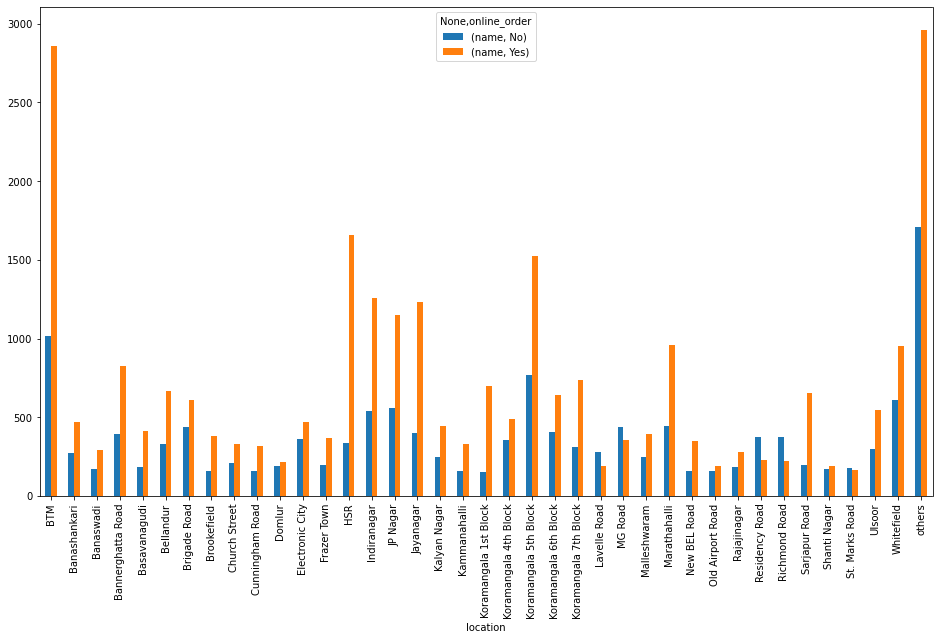

In [58]:
df1.plot(kind='bar',figsize=(16,9))

In [59]:
#visualizing book table facility,location wise

In [60]:
df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    3719  154
Banashankari            691   53
Banaswadi               455    8
Bannerghatta Road      1126   98
Basavanagudi            579   16
Bellandur               898   98
Brigade Road            877  171
Brookefield             471   72
Church Street           362  181
Cunningham Road         299  175
Domlur                  351   55
Electronic City         736   96
Frazer Town             555    8
HSR                    1784  208
Indiranagar            1367  428
JP Nagar               1422  288
Jayanagar              1365  269
Kalyan Nagar            549  143
Kammanahalli            443   49
Koramangala 1st Block   801   50
Koramangala 4th Block   531  310
Koramangala 5th Block  1625  670
Koramangala 6th Block   940  112
Koramangala 7th Block   891  162
Lavelle Road            248  228
MG Road                 445  347
Malleshwaram            552   89
Marathahalli           1244  163
New BEL Road            450   56
Old Airport Road        294   59
Rajajinagar             420   41
Residency Road          452  149
Richmond Road           487  116
Sarjapur Road           699  153
Shanti Nagar            309   57
St. Marks Road          219  124
Ulsoor                  666  177
Whitefield             1316  252
others                 4277  390

<AxesSubplot:xlabel='location'>

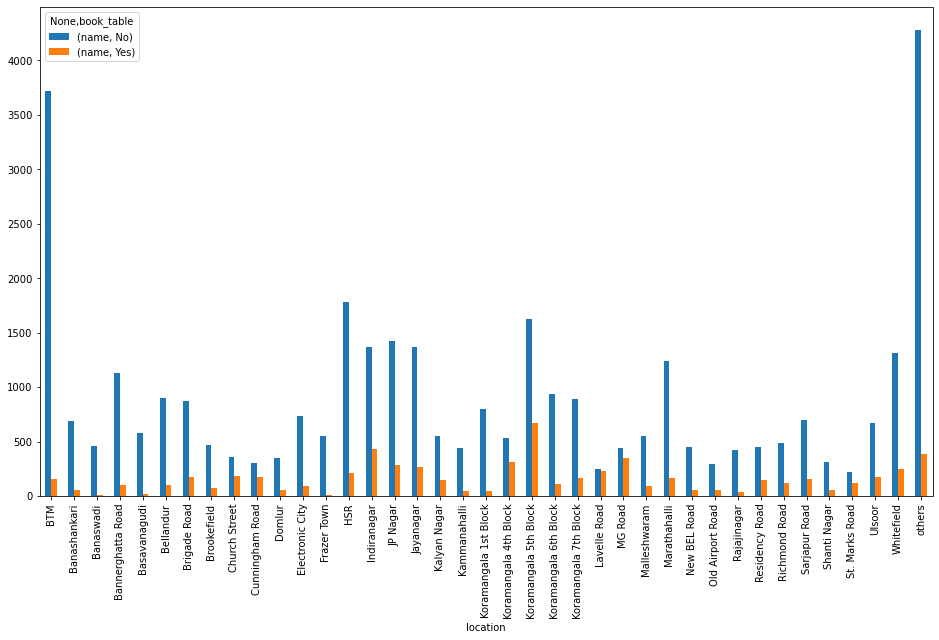

In [61]:
df2.plot(kind='bar',figsize=(16,9))

In [62]:

def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df
df_en = Encode(df.copy())

In [63]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  int64  
 1   online_order  41190 non-null  int64  
 2   book_table    41190 non-null  int64  
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   location      41190 non-null  int64  
 6   rest_type     41190 non-null  int64  
 7   cuisines      41190 non-null  int64  
 8   Cost2plates   41190 non-null  int64  
 9   Type          41190 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In [64]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,0,0,0,4.1,775,0,0,0,0,0
1,1,0,1,4.1,787,0,0,0,0,0
2,2,0,1,3.8,918,0,1,0,0,0
3,3,1,1,3.7,88,0,2,1,1,0
4,4,1,1,3.8,166,1,0,0,2,0


# checking Assumptions

<AxesSubplot:>

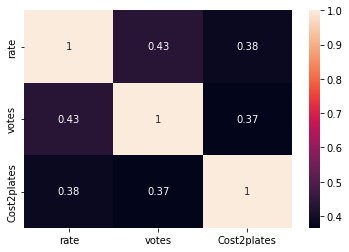

In [65]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
sns.heatmap(corrmat,annot=True)

# 1. Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear.
Let's use a pair plot to check the relation of independent variables with the variable

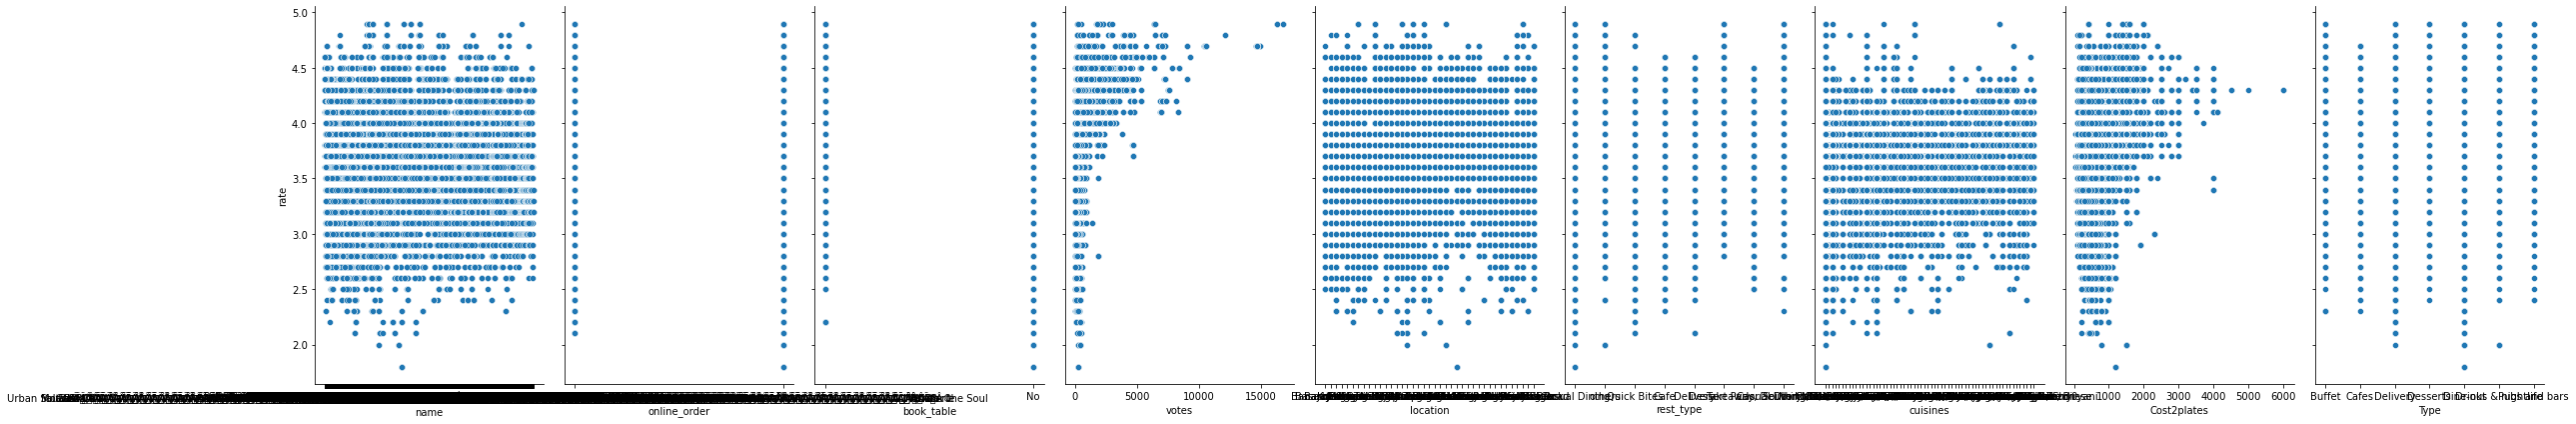

In [66]:
plt.rcParams['figure.figsize'] = [30,45]
p = sns.pairplot(df, x_vars=['name','online_order','book_table','votes','location','rest_type','cuisines','Cost2plates',
                             'Type'], y_vars='rate', size=6, aspect=0.6)

By looking at the plots we can see that some of the independent variables
form an accurately linear shape like book table,rest type,type do still better than votes and cost2plates which seems to hardly have any 
specific shape. So it shows that a linear regression fitting might not be the best model for it.
A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

# 2.normality

<AxesSubplot:xlabel='rate', ylabel='Density'>

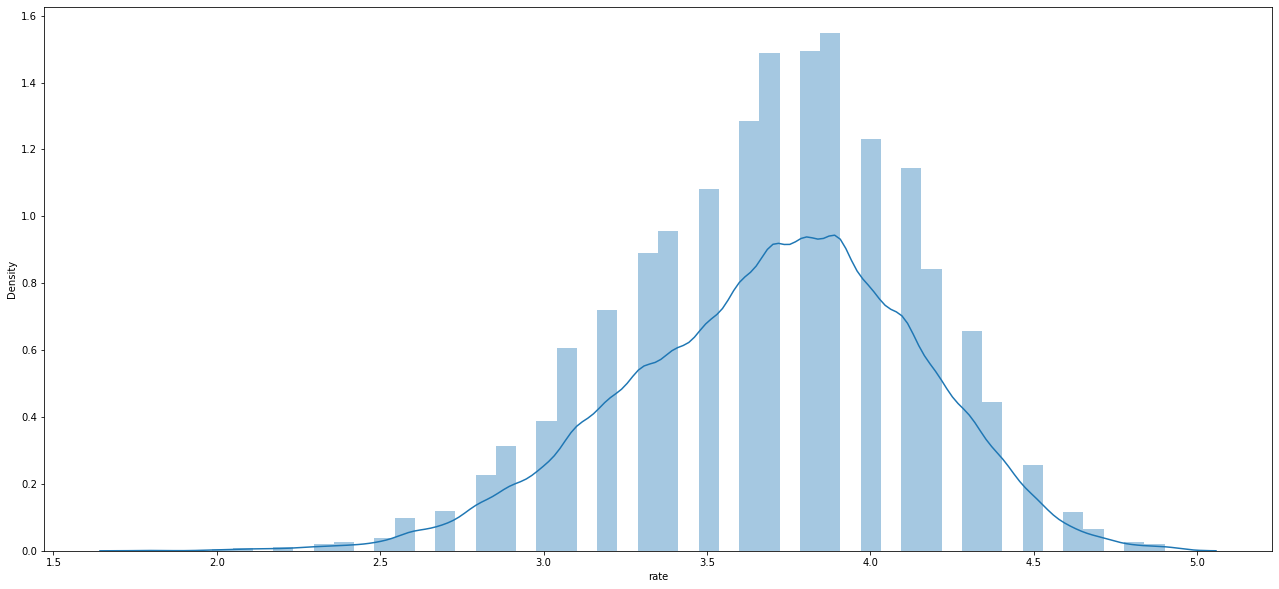

In [67]:
plt.figure(figsize=(22,10))
sns.distplot(df['rate'],kde=True)

### we can see that rate column is normally distributed

# 3. multicolinearity

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

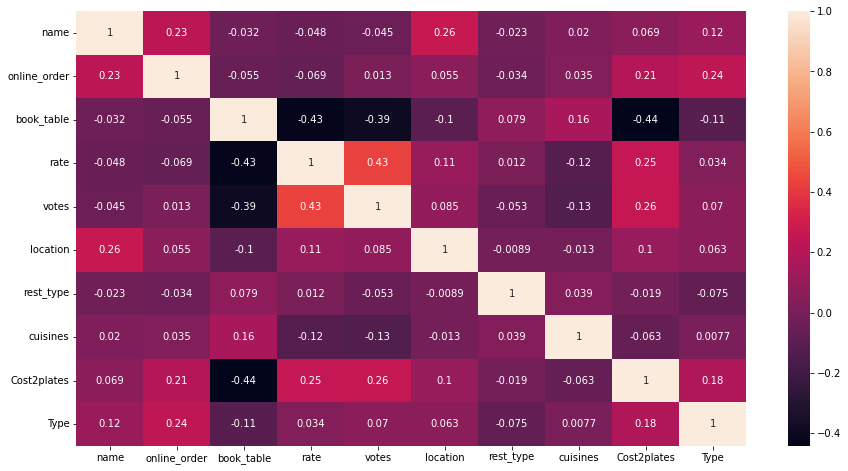

In [68]:
#Get Correlation between different variables
corr = df_en.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

In [108]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
#Defining the independent variables and dependent variables
x=df_en.drop(["rate"], axis=1) #modified
y = df_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type
15926,7,0,0,3764,11,1,0,2,2
44521,1173,0,1,336,38,2,0,5,4
35264,3350,0,1,5,9,1,44,12,2
22550,929,0,1,35,6,2,23,1,2
4083,1617,0,1,536,17,4,60,2,2


In [70]:
y_train.head()

15926    4.4
44521    4.0
35264    3.3
22550    3.6
4083     4.4
Name: rate, dtype: float64

In [71]:
#with the help of vif we can also find multicolinearity in between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))

In [72]:
pd.DataFrame({'vif': vif}, index=df.columns[0:9]).T

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates
vif,3.368822,1.736504,4.541247,1.324529,2.879762,2.125689,1.431706,2.577022,5.747156


In [73]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [74]:
# Residual
y_pred = lr.predict(x_test)
residual = y_test - y_pred

# 4.normality of residual

Residuals as we know are the differences between the true value and the predicted value. 
One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

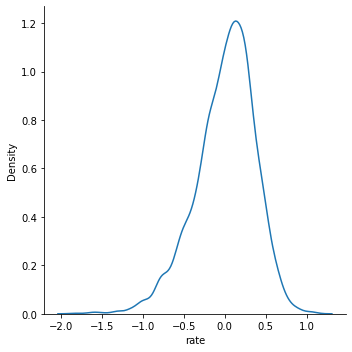

In [75]:
sns.displot(residual,kind='kde')

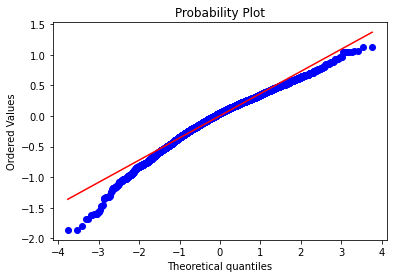

In [76]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

### Homoscedasticity

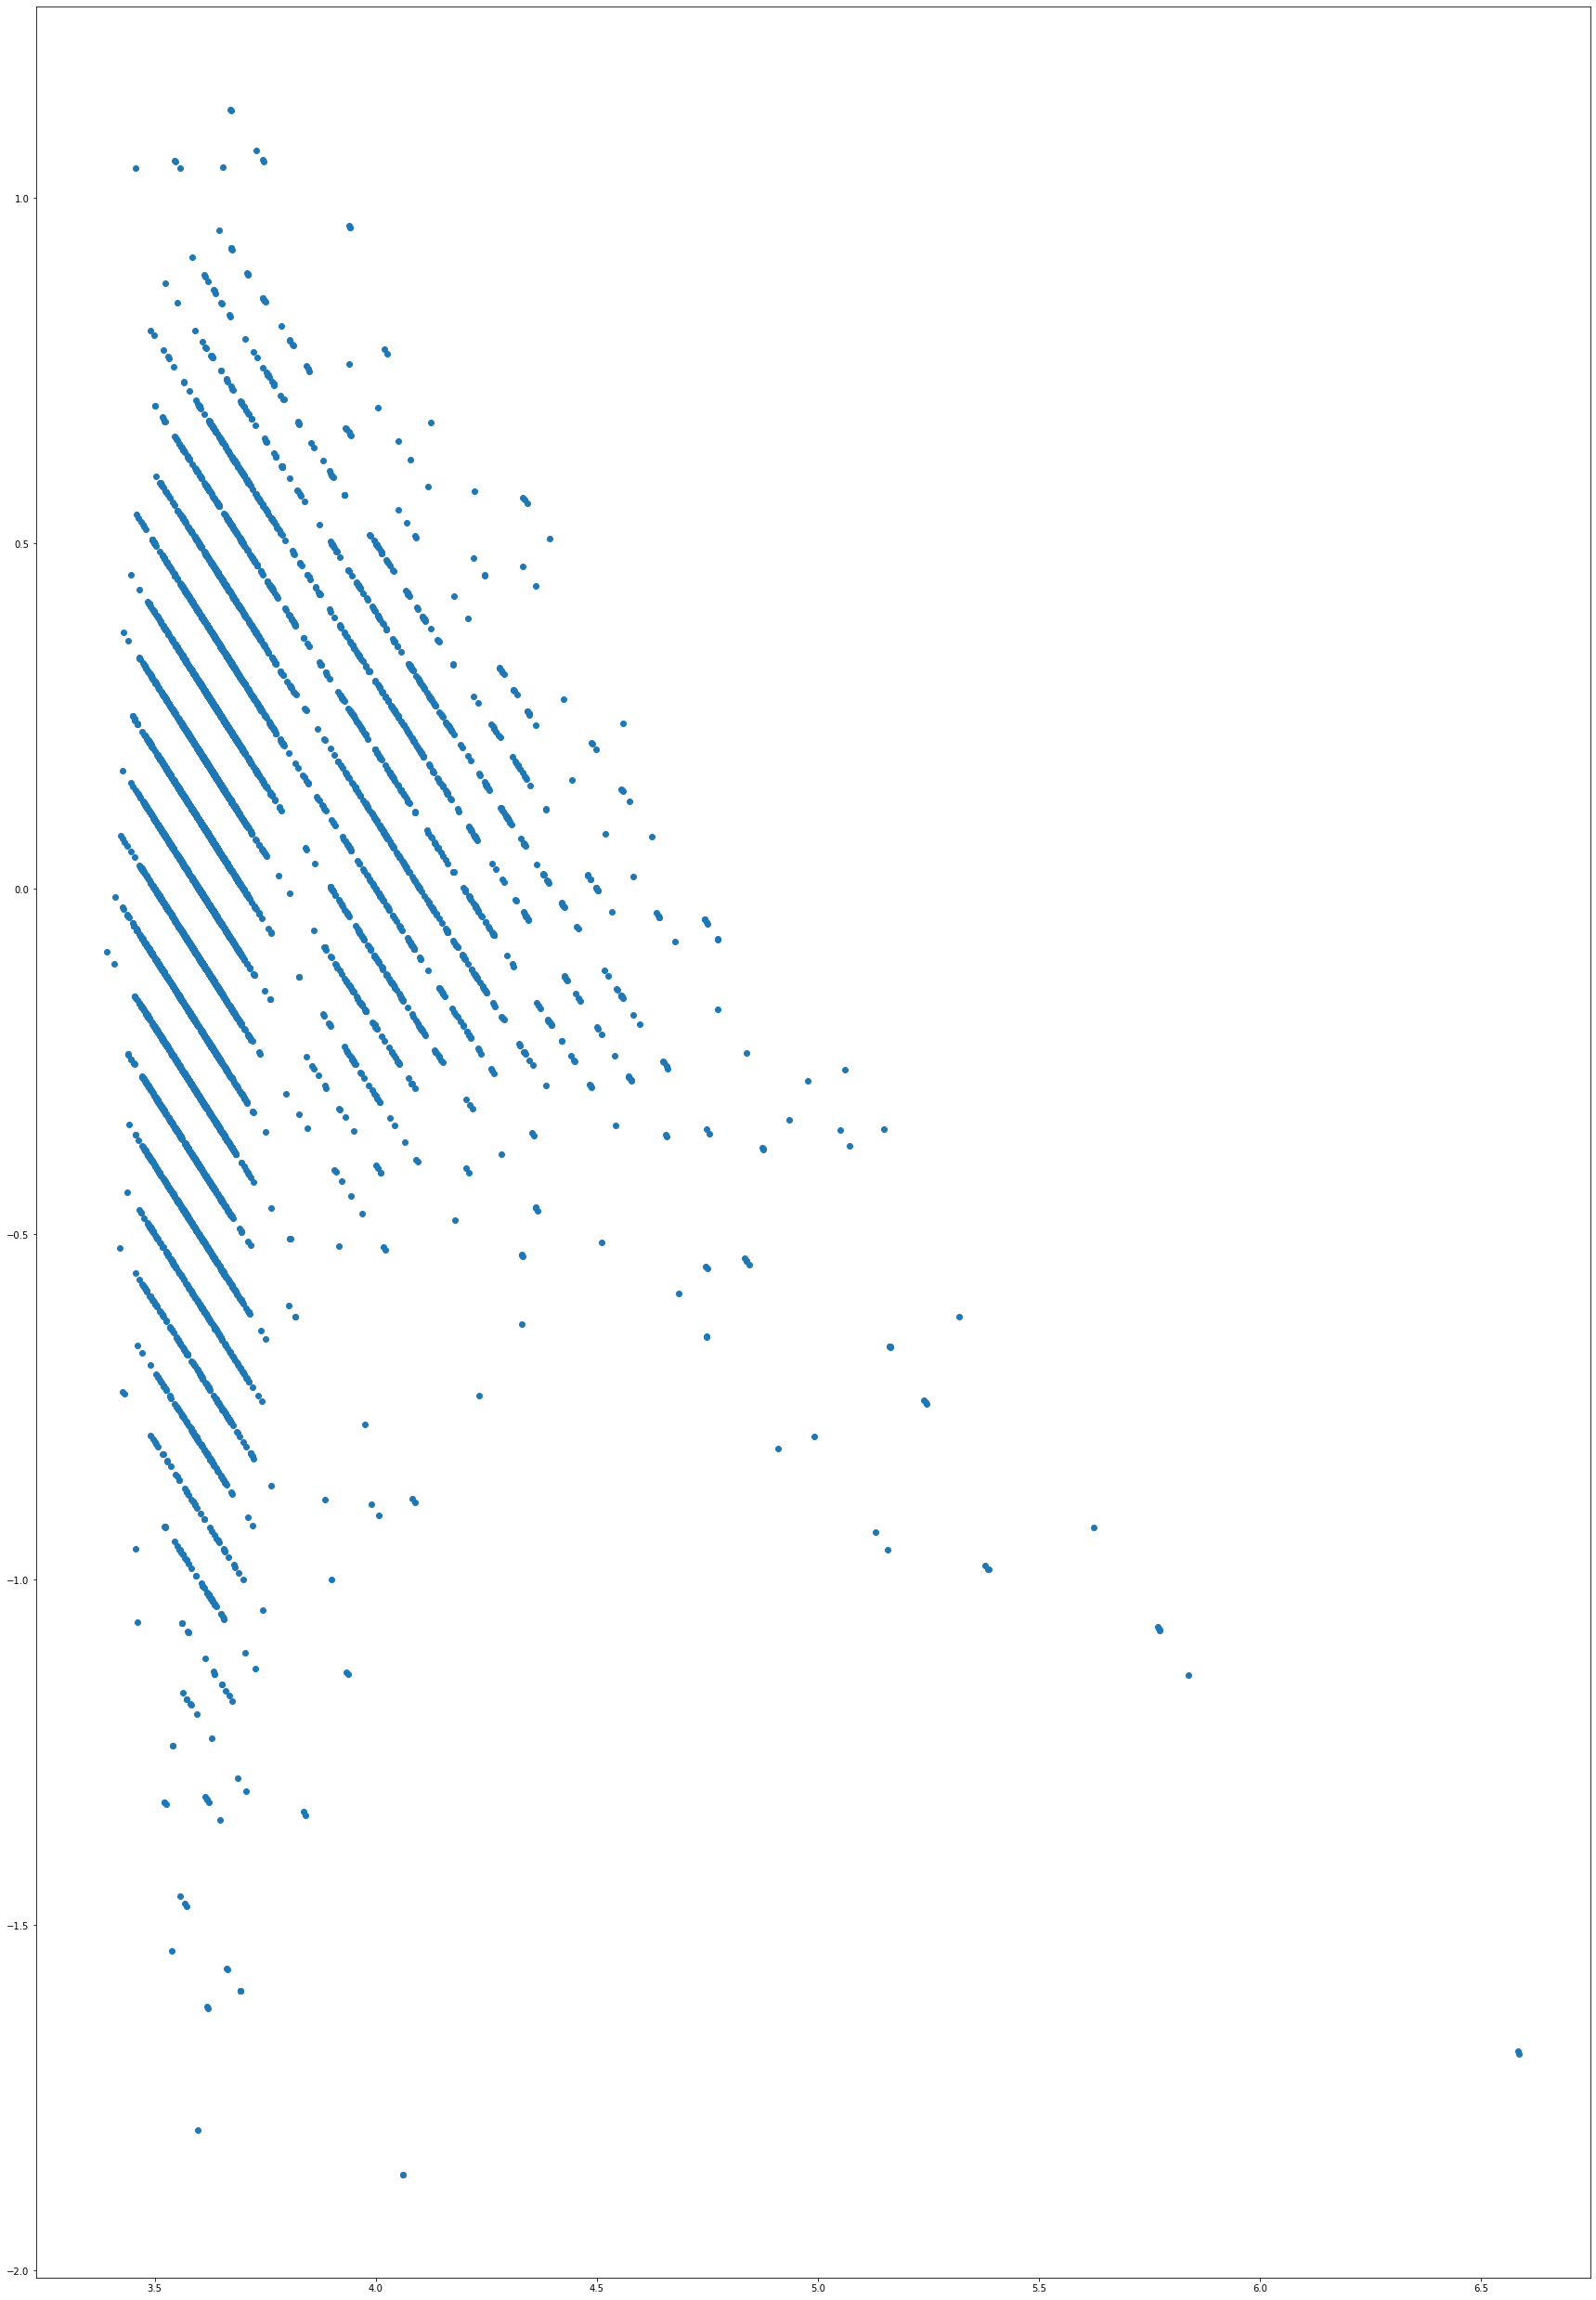

In [77]:
plt.scatter(y_pred,residual)

# Model Building

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def measure(Y_test,y_pred):
  print('Mean Absolute Error (MAE): ', round(mean_absolute_error(Y_test, y_pred), 3))
  print('Mean Squared Error (MSE): ', round(mean_squared_error(Y_test, y_pred), 3))
  print('Root Mean Squared Error (RMSE): ', round(np.sqrt(mean_squared_error(Y_test, y_pred)), 3))
  print('R2 Score: ', round(r2_score(Y_test, y_pred), 5))
  print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(mean_squared_error(Y_test, y_pred))), 3))

In [106]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 
print(measure(y_test,y_pred))

Mean Absolute Error (MAE):  0.286
Mean Squared Error (MSE):  0.134
Root Mean Squared Error (RMSE):  0.367
R2 Score:  0.2908
Root Mean Squared Log Error (RMSLE):  -1.004
None


In [93]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor()
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

print(measure(y_test,y_predict))

Mean Absolute Error (MAE):  0.05
Mean Squared Error (MSE):  0.012
Root Mean Squared Error (RMSE):  0.11
R2 Score:  0.93569
Root Mean Squared Log Error (RMSLE):  -2.204
None


In [94]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

print(measure(y_test,y_predict))

Mean Absolute Error (MAE):  0.087
Mean Squared Error (MSE):  0.032
Root Mean Squared Error (RMSE):  0.178
R2 Score:  0.83348
Root Mean Squared Log Error (RMSLE):  -1.728
None


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



print(measure(y_test,y_predict))

Mean Absolute Error (MAE):  0.216
Mean Squared Error (MSE):  0.089
Root Mean Squared Error (RMSE):  0.298
R2 Score:  0.53006
Root Mean Squared Log Error (RMSLE):  -1.209
None


In [96]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

print(measure(y_test,y_predict))

Mean Absolute Error (MAE):  0.14
Mean Squared Error (MSE):  0.039
Root Mean Squared Error (RMSE):  0.197
R2 Score:  0.79505
Root Mean Squared Log Error (RMSLE):  -1.624
None


In [97]:
# now, showing results in tabluar form.

In [98]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test),  DTree.score(x_test, y_test), RForest.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)


,Model,Score
2,Random Forest,0.935687
1,Decision Tree,0.833476
4,XgBoost,0.795054
3,Gradient Boost,0.530058
0,Linear Regression,0.290796


# we can see that the best model is random forest 

# hypertunning the model

In [99]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [100]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [101]:
#predicting the values
pred=rf_model.predict(x_test)

print(measure(y_test,pred))

Mean Absolute Error (MAE):  0.109
Mean Squared Error (MSE):  0.03
Root Mean Squared Error (RMSE):  0.172
R2 Score:  0.84316
Root Mean Squared Log Error (RMSLE):  -1.758
None


# 